In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Punto 1

In [2]:
class Function:

    def __init__(self, x):
        self.x = x
        self.fx = self.Fx(self.x)

    def Fx(self, array):
        fx = np.sin(10*array)
        return fx

    @staticmethod
    def graficar(x, fx, title=None):
        plt.plot(x, fx)
        if title:
            plt.title(title)
        plt.show()

    def calcularMax(self):
        return max(self.fx)

    def calcularMin(self):
        return min(self.fx)

    def calcularMed(self):
        u = 0
        for i in self.fx:
            u += i
        u = u / len(self.x)
        return u

    def calcularVar(self):
        u = self.calcularMed()
        varianza = 0

        for i in self.fx:
            varianza  = varianza + (i - u)**2

        varianza = varianza/len(self.x)
        return varianza

    def calcularStd(self):
        std = self.calcularVar()
        std = np.sqrt(std)
        return std

Max: 0.9999937428570164
Min: -0.9999937428570209
Med: 0.0016467193735093242
Varianza: 0.5025289042127604
Std: 0.7088927311044743


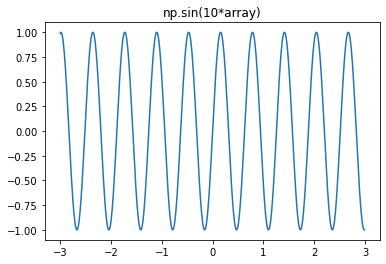

In [3]:
x = np.arange(-3, 3, 0.01)

func = Function(x)
fx = func.Fx(x)

print(f'Max: {func.calcularMax()}')
print(f'Min: {func.calcularMin()}')
print(f'Med: {func.calcularMed()}')
print(f'Varianza: {func.calcularVar()}')
print(f'Std: {func.calcularStd()}')

func.graficar(x, fx, 'np.sin(10*array)')

# Punto 2

In [4]:
class Transformaciones(Function):

    def Fx(self, array):
        fx = np.exp(-1*array)*np.sin(10*array)
        return fx

    def desplazamientoVertical(self, k=0): # OK
        fx = self.fx + k
        return fx

    def desplazamientoHorizontal(self, k=0):
        x = self.x + k
        fx = self.Fx(x)
        return fx

    def reflexionEjeX(self): # OK
        fx = -self.fx
        return fx

    def reflexionEjeY(self):
        fx = self.Fx(-self.x)
        return fx

    def expansión_contraccion_EjeX(self, k=1):
        x = self.x*k
        self.fx = self.Fx(x)

    def expansión_contraccion_EjeY(self, k=1): # OK
        self.fx = k*self.fx

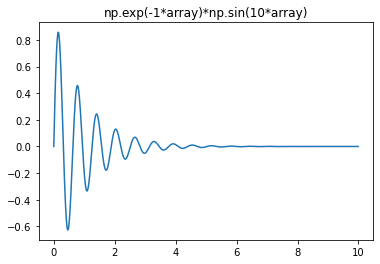

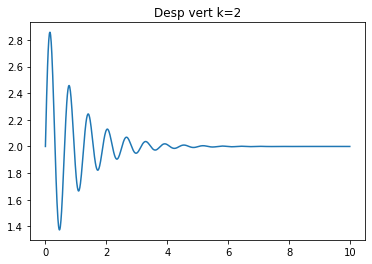

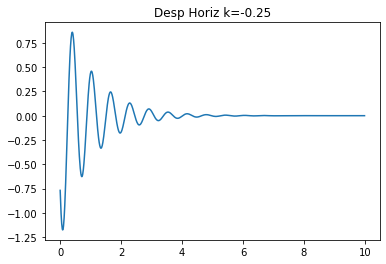

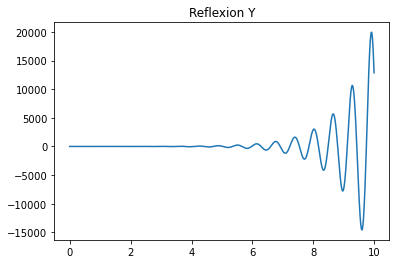

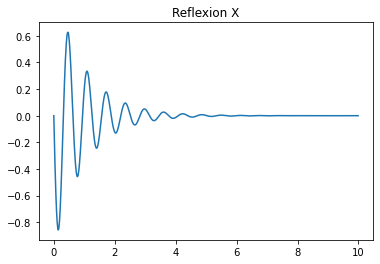

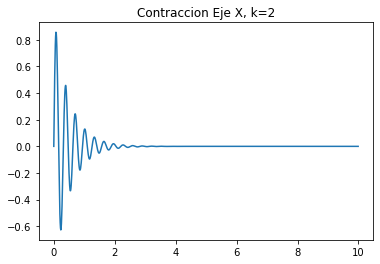

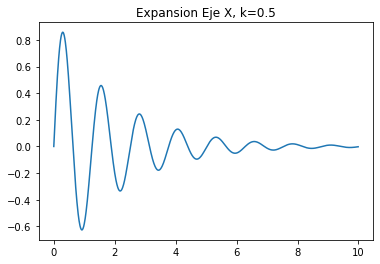

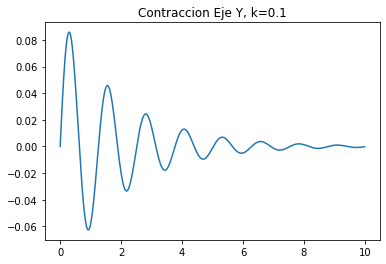

In [5]:
x = np.arange(0, 10, 0.01)
transf = Transformaciones(x)

fx = transf.Fx(x)

transf.graficar(transf.x, transf.fx, 'np.exp(-1*array)*np.sin(10*array)')

# Desplazamientos
fx_dezpl_vertical = transf.desplazamientoVertical(k=2)
transf.graficar(transf.x, fx_dezpl_vertical, 'Desp vert k=2')
fx_dezpl_horizontal = transf.desplazamientoHorizontal(k=-0.25)
transf.graficar(transf.x, fx_dezpl_horizontal, 'Desp Horiz k=-0.25')

# Reflexiones
fx_ref_y = transf.reflexionEjeY()
transf.graficar(transf.x, fx_ref_y, 'Reflexion Y')
fx_ref_x = transf.reflexionEjeX()
transf.graficar(transf.x, fx_ref_x, 'Reflexion X')

# Expansiones
transf.expansión_contraccion_EjeX(k=2)
transf.graficar(transf.x, transf.fx, 'Contraccion Eje X, k=2')
transf.expansión_contraccion_EjeX(k=0.5)
transf.graficar(transf.x, transf.fx, 'Expansion Eje X, k=0.5')

# Contracciones
transf.expansión_contraccion_EjeY(k=0.1)
transf.graficar(transf.x, transf.fx, 'Contraccion Eje Y, k=0.1')

# Punto 3

In [6]:
from __future__ import annotations

In [7]:
class Album:

    fotos: Foto = []

    def agregar_foto(self, foto: Foto):
        self.fotos.append(foto)

    def remover_foto(self, nombre: str):
        for index, foto in enumerate(self.fotos):
            if foto.nombre == nombre:
                self.fotos.pop(index)

    def imprimir_nombres_fotos(self):
        for index, foto in enumerate(self.fotos):
            print(f'Foto {index+1}: {foto}')

In [8]:
class Foto:

    def __init__(self, nombre, ruta_archivo):
        self.nombre = nombre
        self.datos = np.load(ruta_archivo)

    def graficar(self):
        plt.imshow(self.datos)
        plt.show()

    def tomar_canal(self, canal):
        return self.datos[:,:,canal]

    def tomar_submatriz(self, n, pixel: tuple):
        if n < 1 and n%2!=0:
            raise Exception('n debe ser impar y mayor a 1')

        # k: pixeles a tomar a cada lado del objetivo
        k = (n-1)//2
        i, j = pixel
        x = self.datos[i-k:i+k+1, j-k:j+k+1]
        return x

    def difuminar_submatriz(submatriz):
        promedio = submatriz.mean()
        for i in range(submatriz.shape[0]):
            for j in range(submatriz.shape[1]):
                submatriz[i, j] = submatriz[i, j]*promedio

    def reemplazar_submatriz(self, submatriz, n, pixel: tuple):
        # k: pixeles a tomar a cada lado del objetivo
        k = (n-1)//2
        i, j = pixel
        self.datos[i-k:i+k+1, j-k:j+k+1] = submatriz

    def difuminar_pixel(self, pixel: tuple, n):
        submatriz = self.tomar_submatriz(n, pixel)
        self.difuminar_submatriz(submatriz)
        self.reemplazar_submatriz(submatriz, n, pixel)

    def difuminar(self, r1, r2, x0, y0, times, n):
        # Debe iterar sobre cada pixel que desee ser difuminado
        # con el metodo difuminar_pixel
        pass

    def pixelar(self):
        pass

    def __str__(self):
        return self.nombre

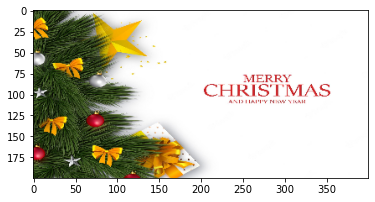

Fotos existentes:
Foto 1: jheyston_merry_christmas
Foto 2: jheyston_navidad
Fotos restantes:
Foto 1: jheyston_navidad


In [10]:
# Crear album de fotos
album = Album()

# Cargar Foto 1
file_name = 'jheyston_merry_christmas.npy'
nombre_foto = 'jheyston_merry_christmas'
foto = Foto(nombre_foto, file_name)
foto.graficar()
# foto.difuminar()

# Agregar foto 1 al album
album.agregar_foto(foto)

# Cargar Foto 2
file_name_2 = 'jheyston_navidad.npy'
nombre_foto_2 = 'jheyston_navidad'
foto_2 = Foto(nombre_foto_2, file_name_2)

# Agregar foto 2 al album
album.agregar_foto(foto_2)

# Ver nombres de las fotos del album
print('Fotos existentes:')
album.imprimir_nombres_fotos()

# Remover la foto 2
album.remover_foto(nombre_foto)
print('Fotos restantes:')

# Ver nombres de fotos restantes
album.imprimir_nombres_fotos()